In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import math

In [522]:
# !pip install pandas xlrd openpyxl

In [22]:
path = "CAPE_ALL.xlsx"
df = pd.read_excel(path,sheet_name=0)

In [23]:
df["Date"] = pd.date_range(start='1871-01-01',end='2025-02-01',freq='ME')
df = df.dropna(subset=['CAPE'])
df.reset_index(drop=True, inplace=True)
df.set_index("Date",inplace=False)
df.head()

,Date,P,D,E,CPI,Fraction,Rate GS10,Real Price,Real Dividend,Real Total Return Price,Real Earnings,Scale Earnings,CAPE,TR CAPE,Yield,Monthly Bond Returns,Real Bond Returns,Stock Real Return 10 Yr,Bond Real Return 10 Yr,Returns
0,1881-01-31,6.19,0.265,0.4858,9.419420,1881.041667,3.700000,207.242891,8.872272,383.409300,16.264717,30.090507,18.473952,24.135057,-0.010489,1.003636,2.422306,0.045353,0.056468,-0.011115
1,1881-02-28,6.17,0.270,0.4817,9.514585,1881.125000,3.693333,204.507131,8.949259,379.727725,15.966140,29.645842,18.147258,23.655503,-0.011393,1.003631,2.406798,0.046774,0.056199,-0.009425
2,1881-03-31,6.24,0.275,0.4775,9.514585,1881.208333,3.686667,206.827309,9.114986,385.446207,15.826930,29.495283,18.270119,23.767713,-0.013123,1.003625,2.415537,0.042423,0.054885,-0.012462
3,1881-04-30,6.22,0.280,0.4733,9.609669,1881.291667,3.680000,204.124477,9.188883,381.836216,15.532494,29.055158,17.950108,23.308850,-0.007504,1.003620,2.400307,0.045971,0.054635,-0.008665
4,1881-05-31,6.50,0.285,0.4692,9.514585,1881.375000,3.673333,215.445114,9.446440,404.485199,15.551823,29.197609,18.869719,24.456686,-0.008881,1.003615,2.433070,0.041157,0.054786,-0.013628


In [99]:
from data_prep import DataProcessor 

processor = DataProcessor(df)

df["Real Returns"] = processor.get_real_returns()
df["Nominal Returns"] = processor.get_nominal_returns()

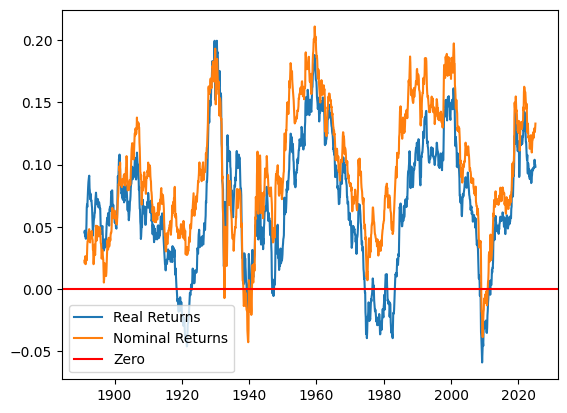

In [100]:
plt.plot(df["Date"], df["Real Returns"], label="Real Returns")
plt.plot(df["Date"], df["Nominal Returns"], label="Nominal Returns")
plt.axhline(y=0, color='r', linestyle='-', label="Zero")
plt.legend()
plt.show()

Scattter Plots

R2 Score:  0.5208929807127467


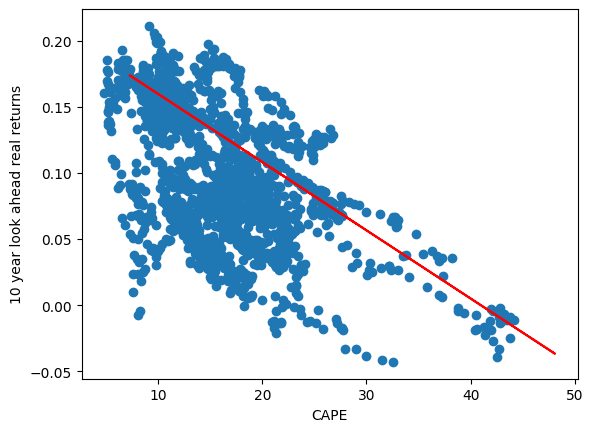

In [107]:
plt.scatter(df["CAPE"], df["Nominal Returns"].shift(-120))
plt.xlabel("CAPE")
plt.ylabel("10 year look ahead real returns")

# fitting ols model
X = df.iloc[540:-120]["TR CAPE"].values.reshape(-1,1)
y = df["Nominal Returns"].shift(-120)[540:-120].values
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
print("R2 Score: ", r2_score(y, y_pred))
plt.plot(X, reg.predict(X), color='red')
plt.show()

CAPE to predict 10 year returns

In [33]:
df['Date'][948]

Timestamp('1960-01-31 00:00:00')

In [108]:
df_train = df.iloc[540:].copy()
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,Date,P,D,E,CPI,Fraction,Rate GS10,Real Price,Real Dividend,Real Total Return Price,...,CAPE,TR CAPE,Yield,Monthly Bond Returns,Real Bond Returns,Stock Real Return 10 Yr,Bond Real Return 10 Yr,Returns,Real Returns,Nominal Returns
0,1926-01-31,12.65,0.6075,1.249,17.9,1926.041667,3.680000,222.869502,10.703022,4044.464170,...,11.340966,16.018851,0.107177,1.005421,6.980342,0.091277,0.070046,0.021232,0.040883,0.095083
1,1926-02-28,12.67,0.6150,1.248,17.9,1926.125000,3.651667,223.221865,10.835158,4067.244255,...,11.389436,16.041273,0.107085,1.005400,7.018182,0.097077,0.069680,0.027397,0.042504,0.098405
2,1926-03-31,11.81,0.6225,1.248,17.8,1926.208333,3.623333,209.239196,11.028908,3829.217291,...,10.712352,15.046869,0.111317,1.005380,7.095724,0.107157,0.069495,0.037662,0.037132,0.100418
3,1926-04-30,11.48,0.6300,1.247,17.9,1926.291667,3.595000,202.256275,11.099430,3718.352412,...,10.395588,14.562367,0.114036,1.005359,7.094045,0.110885,0.069734,0.041151,0.035756,0.101782
4,1926-05-31,11.56,0.6375,1.246,17.8,1926.375000,3.566667,204.809916,11.294665,3782.603234,...,10.575158,14.771860,0.111107,1.005339,7.172133,0.103298,0.068777,0.034521,0.035794,0.091686


RMSE:  0.049070123191576075
R2:  -0.004912029136242335


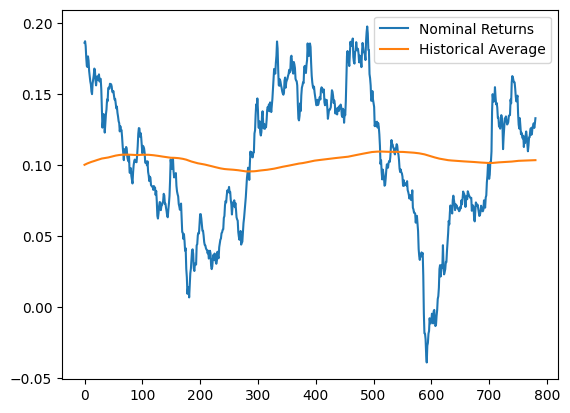

In [37]:
# start_idx = 540  # jan 1926
# end_idx = 948   # dec 1966

# Historical Average
historical_return = []
nominal_returns = []

for i in range(34*12, len(df_train)):
    historical_return.append(df_train["Nominal Returns"][:i].mean())
    nominal_returns.append(df_train["Nominal Returns"][i])

plt.plot(nominal_returns, label="Nominal Returns")
plt.plot(historical_return, label="Historical Average")
plt.legend()

# RMSE & R2
print("RMSE: ", mean_squared_error(nominal_returns, historical_return)**0.5)
print("R2: ", r2_score(nominal_returns, historical_return))

In [38]:
df_train['Date'][34*12]

Timestamp('1960-01-31 00:00:00')

In [74]:
def get_predictions(model):

    start_idx = 34*12  # Start predictions from Jan 1960
    predictions = []
    actuals = []
    dates = []
    

    X_train = df_train.iloc[:start_idx]['TR CAPE'].values.reshape(-1, 1)  # C_t
    y_train = df_train['Nominal Returns'].shift(-120).iloc[:start_idx].values # R_{t+10}

    # standardize
    mu = X_train.mean()
    sigma = X_train.std()
    X_train = (X_train - mu) / sigma
    

    for i in range(start_idx,len(df_train) - 120):

        # idx = max(start_idx+120,i)
        X_test = df_train['TR CAPE'].iloc[i].reshape(1, -1)
        X_test = (X_test - mu) / sigma
        
        y_actual = df_train['Nominal Returns'].shift(-120).iloc[i]
        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)[0]
        predictions.append(y_pred)
        actuals.append(y_actual)
        dates.append(df_train['Date'].iloc[i + 120])

        X_train = np.append(X_train, X_test).reshape(-1, 1)
        y_train = np.append(y_train, y_pred)
    
    return predictions, actuals, dates

def plot_models(predictions, actuals, dates):
    plt.plot(dates,predictions, label="Predictions")
    plt.plot(dates,actuals, label="Actuals")
    plt.axhline(y=0, color='r', linestyle='-', label="Zero")
    plt.xlabel("Time")
    plt.ylabel("10 year look ahead nominal returns")
    plt.legend()
    plt.show()

    # MSE & R2
    from sklearn.metrics import mean_squared_error, r2_score
    print("RMSE: ", mean_squared_error(actuals, predictions)**0.5)
    print("R2: ", r2_score(actuals, predictions))

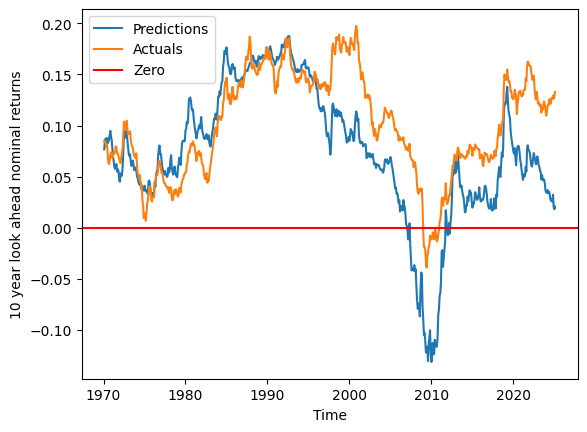

RMSE:  0.049457726731283354
R2:  0.04591796470125031


In [75]:
# Linear Regression
predictions_lr, actuals_lr, dates = get_predictions(LinearRegression())
plot_models(predictions_lr, actuals_lr, dates)

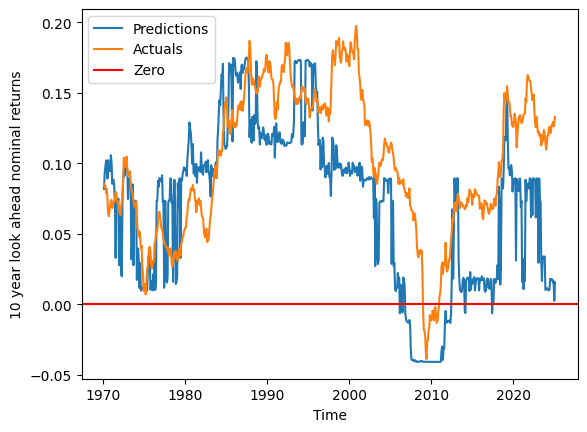

RMSE:  0.05170391328011811
R2:  -0.04271169887522985


In [76]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
predictions_rf, actuals_rf, dates = get_predictions(RandomForestRegressor(n_estimators=50, max_depth=5))
plot_models(predictions_rf, actuals_rf, dates)

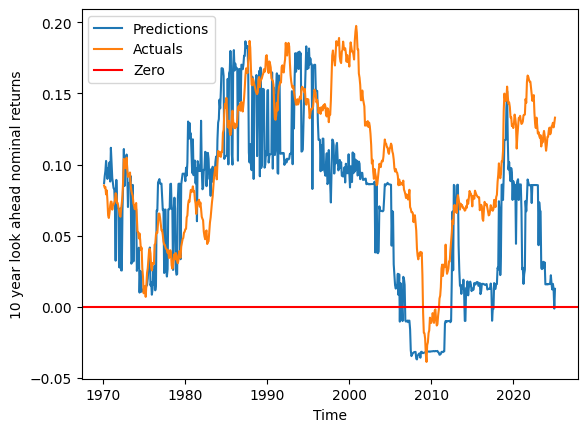

RMSE:  0.05177178386277489
R2:  -0.045450984735770694


In [77]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
predictions_gb, actuals_gb, dates = get_predictions(GradientBoostingRegressor())
plot_models(predictions_gb, actuals_gb, dates)

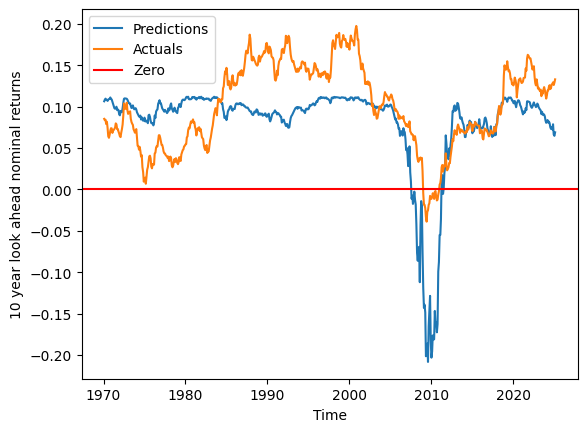

RMSE:  0.05413022227893673
R2:  -0.1428705404844104


In [90]:
# SVR
from sklearn.svm import SVR
predictions_svr, actuals_svr, dates = get_predictions(SVR(kernel='poly', degree=2))
plot_models(predictions_svr, actuals_svr, dates)

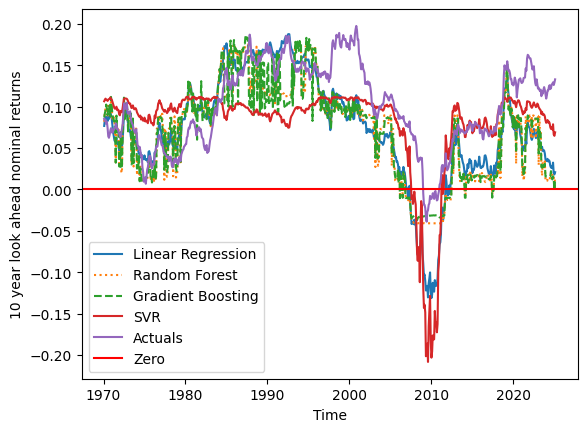

In [98]:
# plot all models
plt.plot(dates,predictions_lr, label="Linear Regression")
plt.plot(dates,predictions_rf, label="Random Forest", linestyle=':')
plt.plot(dates,predictions_gb, label="Gradient Boosting", linestyle='--')
plt.plot(dates,predictions_svr, label="SVR")
plt.plot(dates,actuals_lr, label="Actuals")
plt.axhline(y=0, color='r', linestyle='-', label="Zero")
plt.xlabel("Time")
plt.ylabel("10 year look ahead nominal returns")
plt.legend()
plt.show()